In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


<pre>
Species: 펭귄의 종을 나타내는 문자열
Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
Flipper Length (mm) : 펭귄의 팔(날개) 길이
Sex : 펭귄의 성별
Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   228 non-null    int64  
 1   Species              228 non-null    object 
 2   Island               228 non-null    object 
 3   Clutch Completion    228 non-null    object 
 4   Culmen Length (mm)   228 non-null    float64
 5   Culmen Depth (mm)    228 non-null    float64
 6   Flipper Length (mm)  228 non-null    float64
 7   Sex                  222 non-null    object 
 8   Delta 15 N (o/oo)    219 non-null    float64
 9   Delta 13 C (o/oo)    220 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 17.9+ KB


In [7]:
# 컬럼 정리
train.columns = ['id','species','island','clutch_completion','culmen_length','culmen_depth','flipper_length','sex','delta_15n','delta_13c','body_mass']
test.columns = ['id','island','clutch_completion','culmen_length','culmen_depth','flipper_length','sex','delta_15n','delta_13c','body_mass']

In [8]:
train.shape

(114, 11)

In [9]:
test.shape

(228, 10)

### 결측 확인

In [10]:
# 결측값
train.isna().sum()

id                   0
species              0
island               0
clutch_completion    0
culmen_length        0
culmen_depth         0
flipper_length       0
sex                  3
delta_15n            3
delta_13c            3
body_mass            0
dtype: int64

In [11]:
train[train['sex'].isnull()]

,id,species,island,clutch_completion,culmen_length,culmen_depth,flipper_length,sex,delta_15n,delta_13c,body_mass
6,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
70,70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650


In [12]:
train[train['delta_15n'].isnull()]

,id,species,island,clutch_completion,culmen_length,culmen_depth,flipper_length,sex,delta_15n,delta_13c,body_mass
8,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


### 분포 확인

In [13]:
train.describe()

,id,culmen_length,culmen_depth,flipper_length,delta_15n,delta_13c,body_mass
count,114.000000,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,56.500000,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,33.052988,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,28.250000,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,56.500000,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,84.750000,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [14]:
train.describe(include='object')

,species,island,clutch_completion,sex
count,114,114,114,111
unique,3,3,2,2
top,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,MALE
freq,48,57,102,56


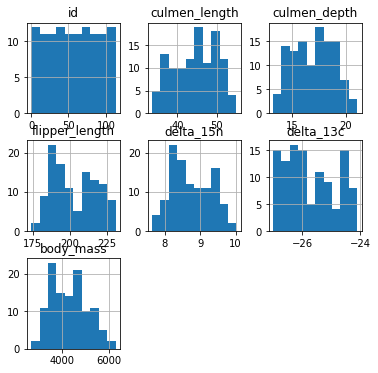

In [15]:
train.hist(figsize=(6,6))
plt.show()

In [16]:
# id 삭제
for df in [train,test]:
    df.drop('id',axis=1,inplace=True)